In [2]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

from numpy import where

import scipy.stats as stats
from scipy.special import inv_boxcox   
import os #we will use the function listdir to list files in a folder
import math
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
from scipy import signal
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

%matplotlib inline

pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('C:/Users/Ouroboros/data_mid_bootcamp_project_regression/regression_data.csv', header=None) 
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [4]:
data.unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [4]:
data.columns=['id',"date","bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition1","grade","sqft_above","sqft_basement","yr_built","yr_renovated","zipcode","lat","long1","sqft_living15","sqft_lot15","price"]
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition1,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long1,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [5]:
data.to_csv('C:/Users/Ouroboros/data_mid_bootcamp_project_regression/regression_data_test.csv', index=False)

In [6]:
data2 = pd.read_csv('C:/Users/Ouroboros/data_mid_bootcamp_project_regression/regression_data_test.csv')
data2.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition1,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long1,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [7]:
data2.shape

(21597, 21)

In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition1     21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long1          21597 non-null  float64
 18  sqft_l

In [9]:
data2['zipcode'] = data2['zipcode'].apply(str)

In [10]:
def filter_variables(data2):
    categorical = data2.select_dtypes('object')
    num_discrete = data2.select_dtypes('int64')
    num_continuous = data2.select_dtypes('float64') 
    return categorical, num_continuous, num_discrete

categorical, num_discrete, num_continuous = filter_variables(data2)

In [11]:
num_discrete.head()

,bathrooms,floors,lat,long1
0,1.00,1.0,47.5112,-122.257
1,2.25,2.0,47.7210,-122.319
2,1.00,1.0,47.7379,-122.233
3,3.00,1.0,47.5208,-122.393
4,2.00,1.0,47.6168,-122.045


In [12]:
num_continuous.head()

,id,bedrooms,sqft_living,sqft_lot,waterfront,view,condition1,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
0,7129300520,3,1180,5650,0,0,3,7,1180,0,1955,0,1340,5650,221900
1,6414100192,3,2570,7242,0,0,3,7,2170,400,1951,1991,1690,7639,538000
2,5631500400,2,770,10000,0,0,3,6,770,0,1933,0,2720,8062,180000
3,2487200875,4,1960,5000,0,0,5,7,1050,910,1965,0,1360,5000,604000
4,1954400510,3,1680,8080,0,0,3,8,1680,0,1987,0,1800,7503,510000


In [13]:
categorical.zipcode.unique()

array(['98178', '98125', '98028', '98136', '98074', '98053', '98003',
       '98198', '98146', '98038', '98007', '98115', '98107', '98126',
       '98019', '98103', '98002', '98133', '98040', '98092', '98030',
       '98119', '98112', '98052', '98027', '98117', '98058', '98001',
       '98056', '98166', '98023', '98070', '98148', '98105', '98042',
       '98008', '98059', '98122', '98144', '98004', '98005', '98034',
       '98075', '98116', '98010', '98118', '98199', '98032', '98045',
       '98102', '98077', '98108', '98168', '98177', '98065', '98029',
       '98006', '98109', '98022', '98033', '98155', '98024', '98011',
       '98031', '98106', '98072', '98188', '98014', '98055', '98039'],
      dtype=object)

In [14]:
categorical.head()

,date,zipcode
0,10/13/14,98178
1,12/9/14,98125
2,2/25/15,98028
3,12/9/14,98136
4,2/18/15,98074


In [15]:
num = data2.select_dtypes(np.number)
num.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition1,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long1,sqft_living15,sqft_lot15,price
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,221900
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,538000
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,180000
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,604000
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,510000


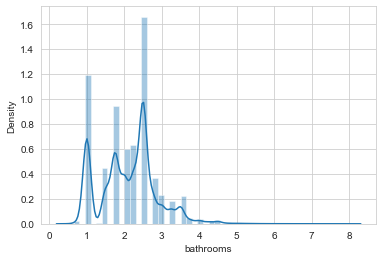

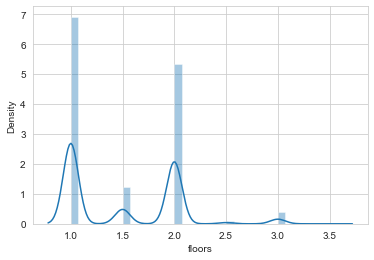

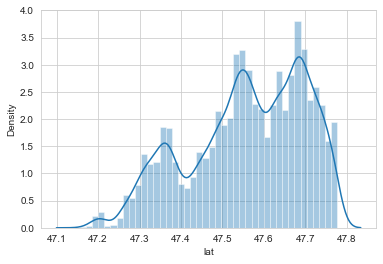

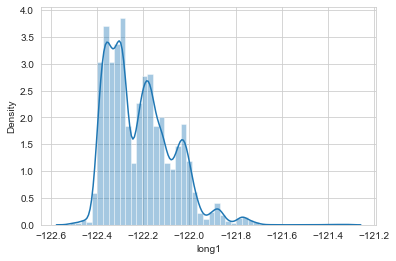

In [16]:
def discrete_plot(data2):
    for col in data2:
        sns.distplot(data[col])
        plt.show()
discrete_plot(num_discrete)

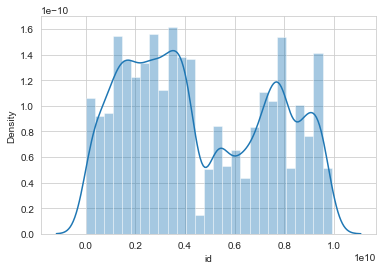

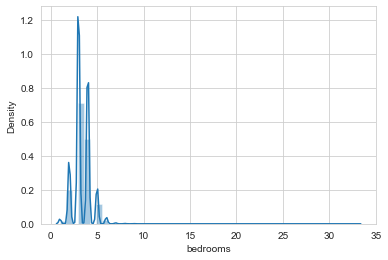

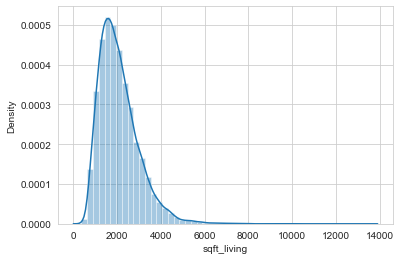

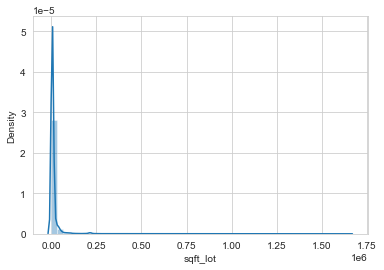

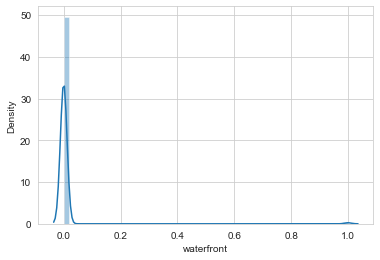

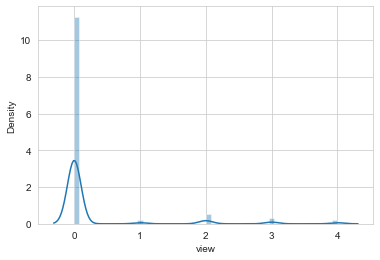

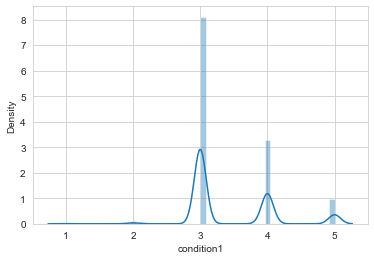

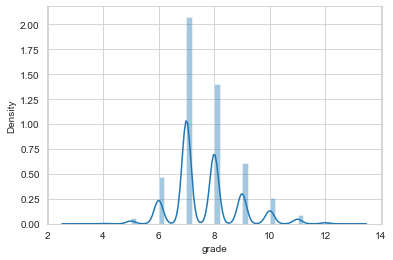

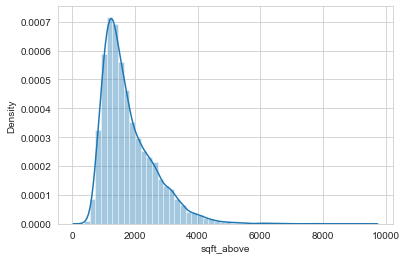

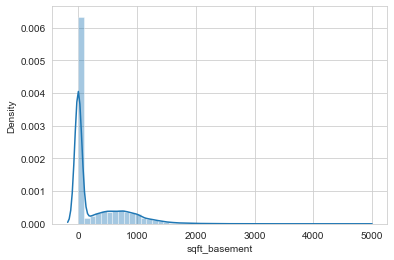

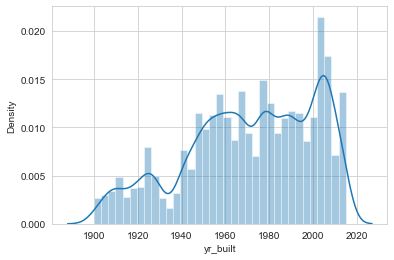

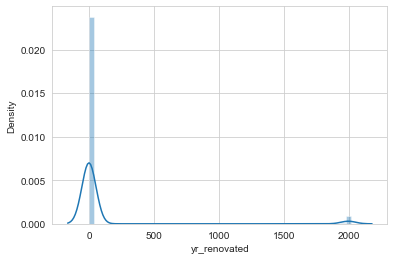

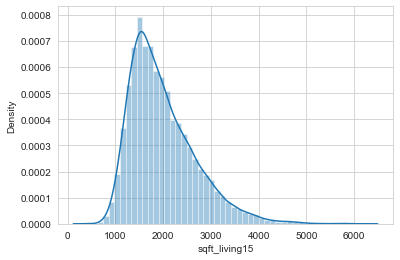

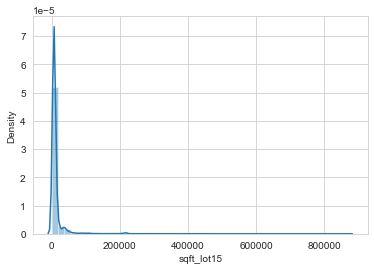

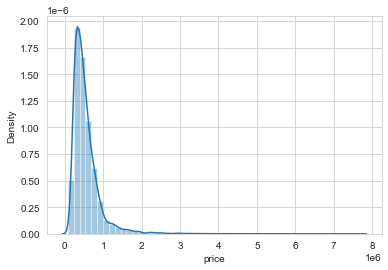

In [17]:
def continuous_plot(data2):
    for col in data2:
        sns.distplot(data[col])
        plt.show()
continuous_plot(num_continuous)

In [18]:
#### improving distribution

In [42]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0: # If the value is finite and != 0...
        return np.log(x)
    else:
        return np.NAN

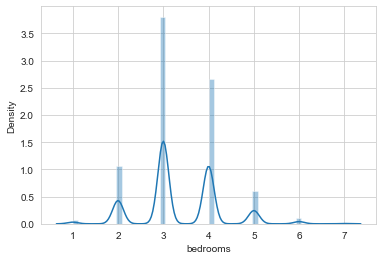

In [43]:
data2['bedrooms'] = data2['bedrooms'].fillna(np.mean(data2['bedrooms']))
sns.distplot(data2['bedrooms'])
plt.show()

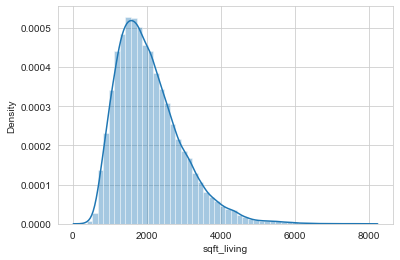

In [44]:
data2['sqft_living'] = data2['sqft_living'].fillna(np.mean(data2['sqft_living']))
sns.distplot(data2['sqft_living'])
plt.show()

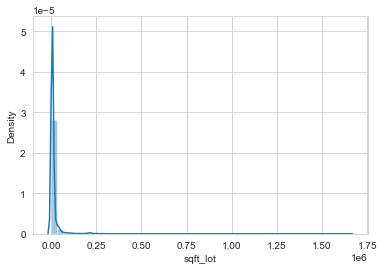

In [45]:
data2['sqft_lot'] = data2['sqft_lot'].fillna(np.mean(data2['sqft_lot']))
sns.distplot(data2['sqft_lot'])
plt.show()

In [23]:
discrete_df = pd.DataFrame.from_dict(num_discrete)
discrete_df.head()

,bathrooms,floors,lat,long1
0,1.00,1.0,47.5112,-122.257
1,2.25,2.0,47.7210,-122.319
2,1.00,1.0,47.7379,-122.233
3,3.00,1.0,47.5208,-122.393
4,2.00,1.0,47.6168,-122.045


In [24]:
continuous_df = pd.DataFrame.from_dict(num_continuous)
continuous_df.head()

,id,bedrooms,sqft_living,sqft_lot,waterfront,view,condition1,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
0,7129300520,3,1180,5650,0,0,3,7,1180,0,1955,0,1340,5650,221900
1,6414100192,3,2570,7242,0,0,3,7,2170,400,1951,1991,1690,7639,538000
2,5631500400,2,770,10000,0,0,3,6,770,0,1933,0,2720,8062,180000
3,2487200875,4,1960,5000,0,0,5,7,1050,910,1965,0,1360,5000,604000
4,1954400510,3,1680,8080,0,0,3,8,1680,0,1987,0,1800,7503,510000


In [25]:
continuous_df.corr()

,id,bedrooms,sqft_living,sqft_lot,waterfront,view,condition1,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
id,1.000000,0.001150,-0.012241,-0.131911,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.002701,-0.138557,-0.016772
bedrooms,0.001150,1.000000,0.578212,0.032471,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,0.393406,0.030690,0.308787
sqft_living,-0.012241,0.578212,1.000000,0.173453,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,0.756402,0.184342,0.701917
sqft_lot,-0.131911,0.032471,0.173453,1.000000,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,0.144763,0.718204,0.089876
waterfront,-0.002727,-0.006834,0.103854,0.021632,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.086507,0.030781,0.266398
view,0.011536,0.080008,0.284709,0.074900,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.280681,0.072904,0.397370
condition1,-0.023803,0.026496,-0.059445,-0.008830,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,-0.093072,-0.003126,0.036056
grade,0.008188,0.356563,0.762779,0.114731,0.082888,0.251728,-0.146896,1.000000,0.756073,0.168220,0.447865,0.014261,0.713867,0.120981,0.667951
sqft_above,-0.010799,0.479386,0.876448,0.184139,0.072109,0.167609,-0.158904,0.756073,1.000000,-0.052156,0.424037,0.023251,0.731767,0.195077,0.605368
sqft_basement,-0.005193,0.302808,0.435130,0.015418,0.080559,0.277078,0.173849,0.168220,-0.052156,1.000000,-0.133064,0.071233,0.200443,0.017550,0.323799


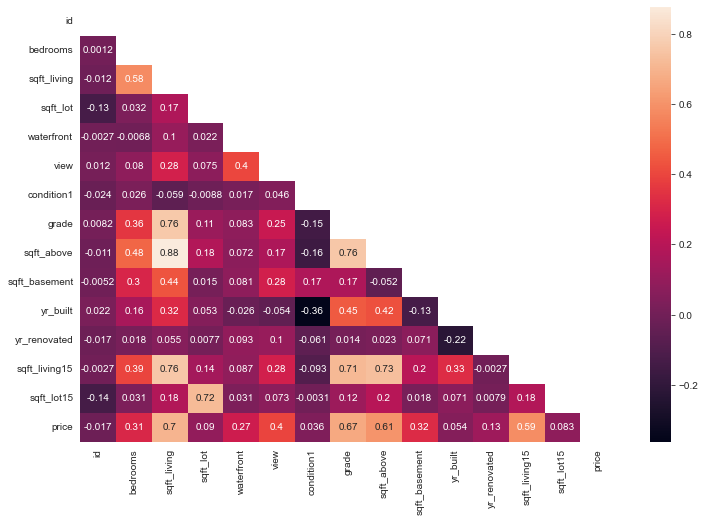

In [26]:
mask = np.zeros_like(continuous_df.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(continuous_df.corr(), mask=mask, annot=True)
plt.show()

In [27]:
discrete_df.corr()

,bathrooms,floors,lat,long1
bathrooms,1.000000,0.502582,0.024280,0.224903
floors,0.502582,1.000000,0.049239,0.125943
lat,0.024280,0.049239,1.000000,-0.135371
long1,0.224903,0.125943,-0.135371,1.000000


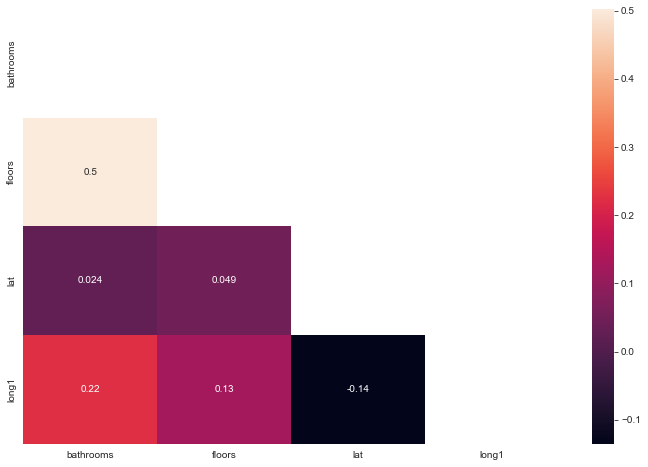

In [28]:
mask = np.zeros_like(discrete_df.corr())
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(discrete_df.corr(), mask=mask, annot=True)
plt.show()

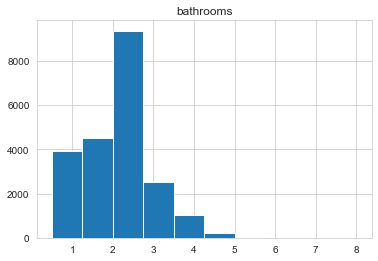

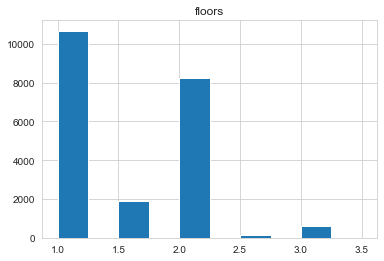

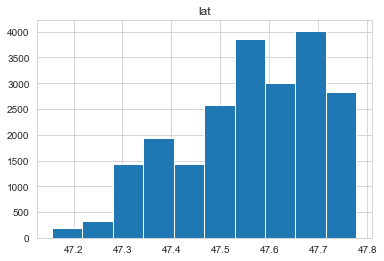

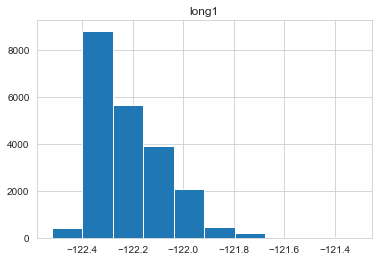

In [29]:
for column in discrete_df:
    discrete_df[column].hist()
    plt.title(column)
    plt.show()

In [30]:
# result: no normal distributions, also no real evenly distributed discrete values

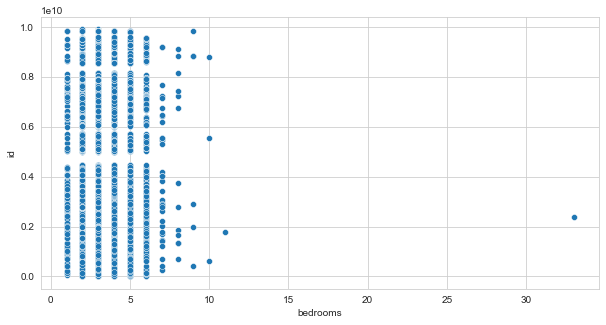

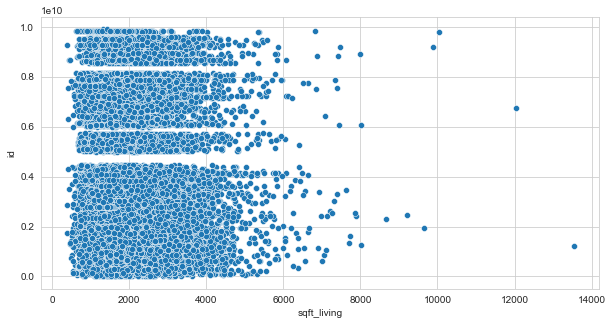

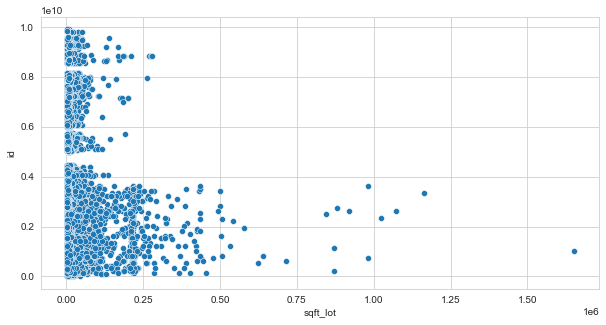

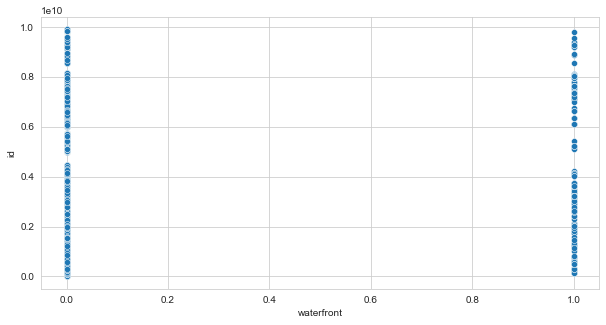

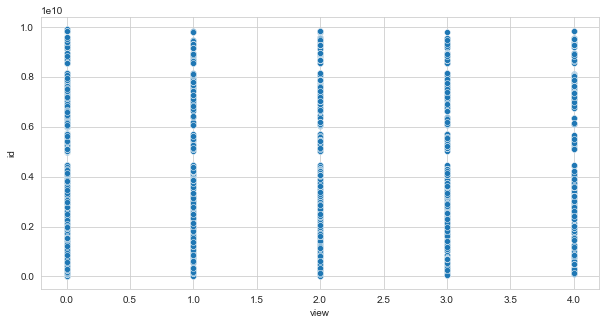

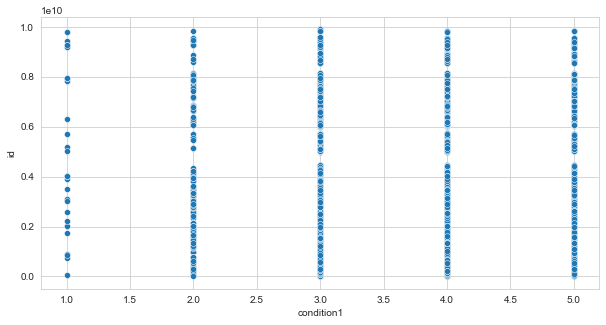

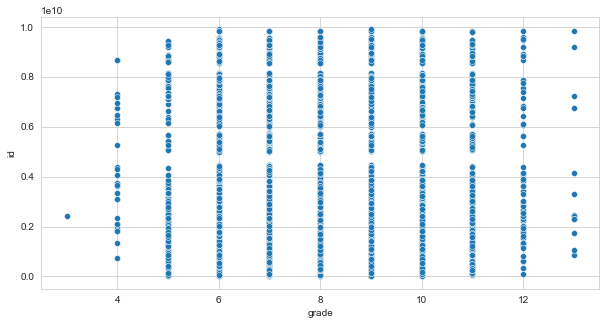

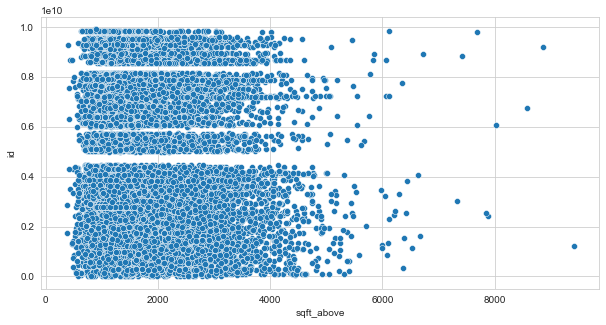

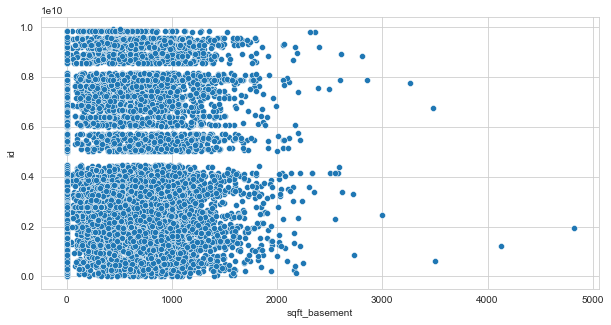

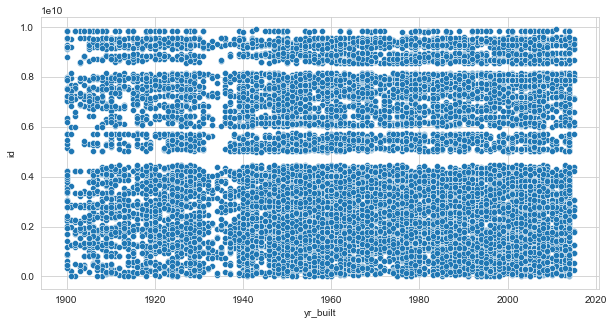

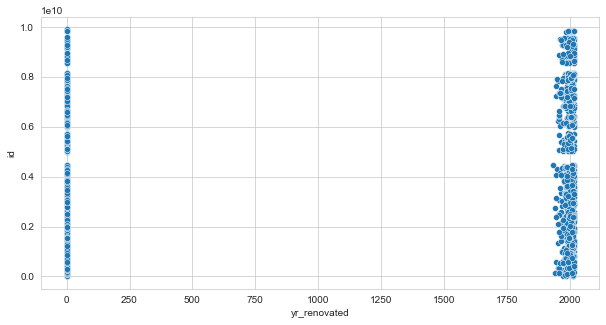

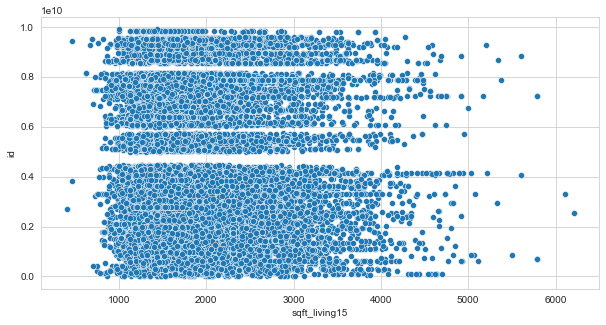

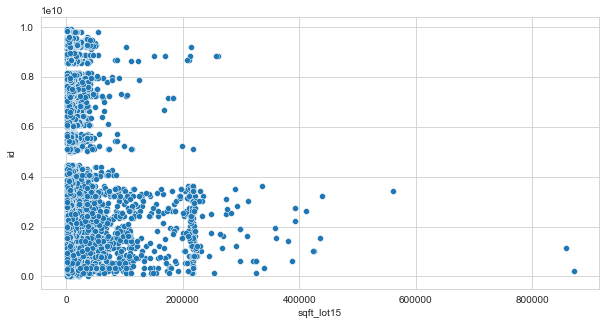

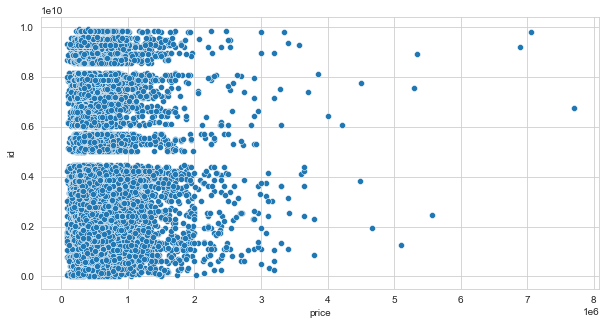

In [31]:
cols_to_include = continuous_df.loc[:, continuous_df.columns != 'id']
for column in cols_to_include:
    plt.figure(figsize=(10,5))
    sns.scatterplot(continuous_df[column],continuous_df['id'])
    plt.show()

In [32]:
#result: strong correlation between condition1 to view and sqft_above and sqft_basement, 
#similar to sqft_living15 but with more outliers

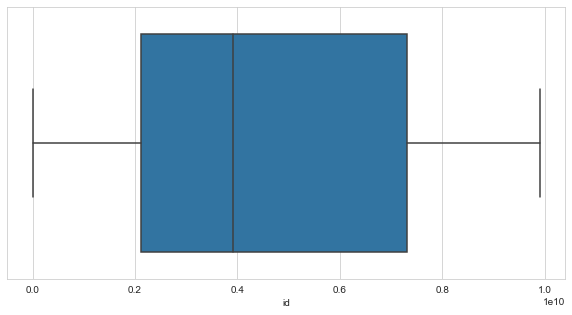

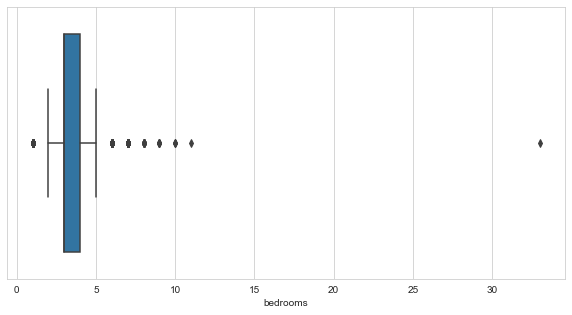

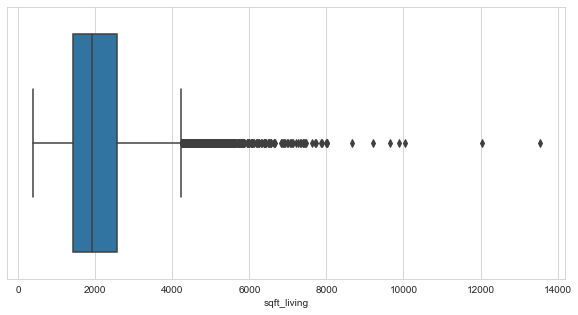

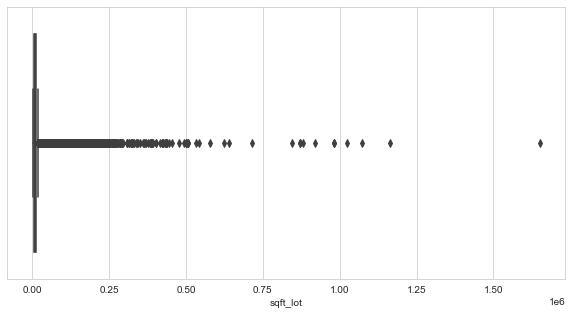

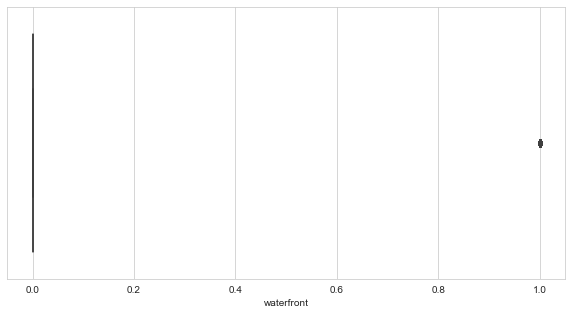

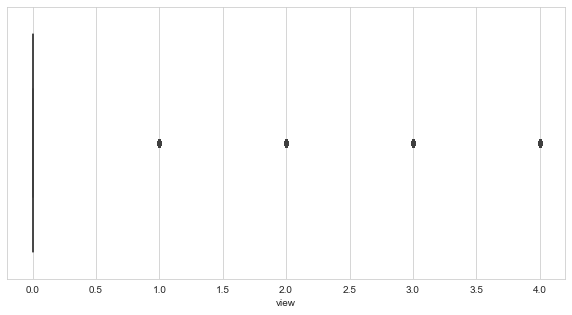

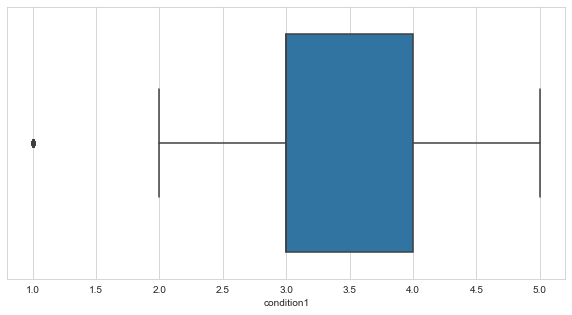

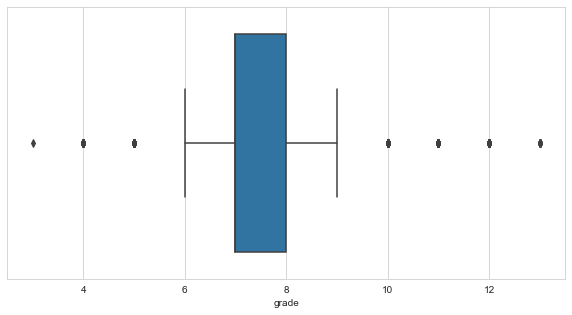

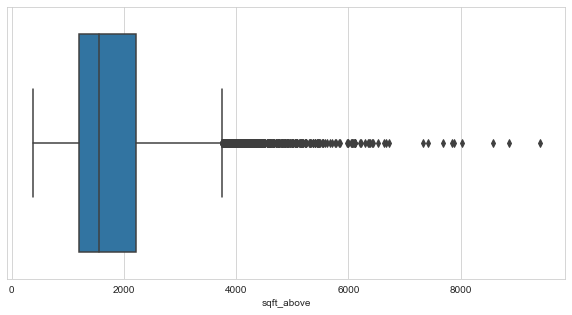

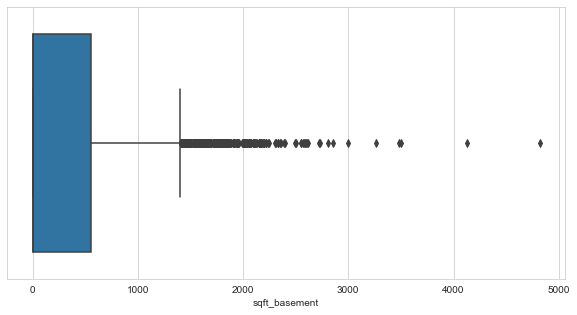

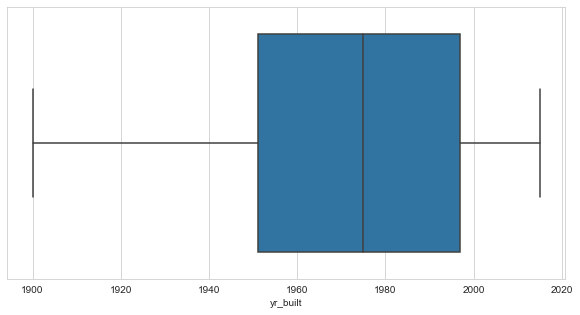

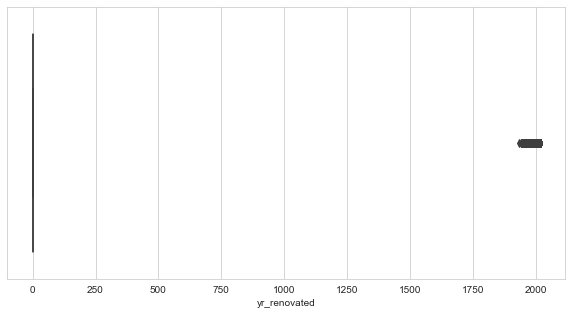

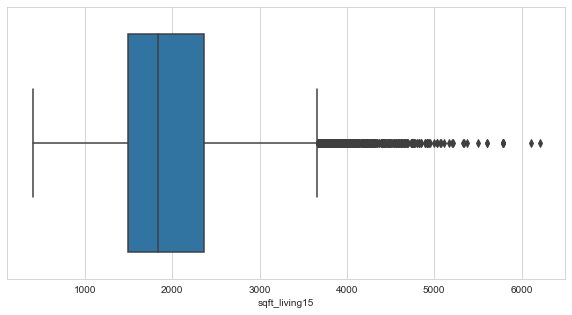

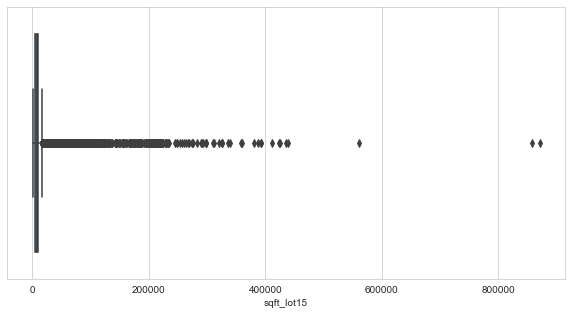

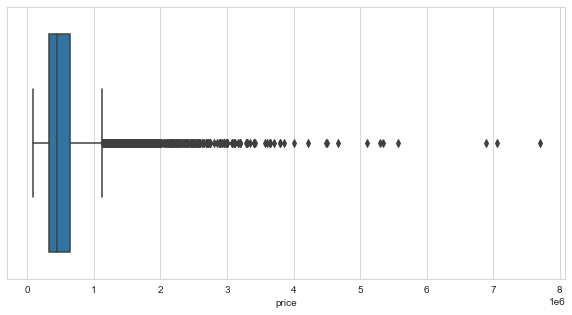

In [33]:
for col in continuous_df:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=continuous_df[col])
    plt.show()

In [34]:
#many values have extreme outliers (bedrooms, sqft_lot, yr_renovated, sqft_lot15, price)

In [35]:
###removing outliers:

In [38]:
#def remove_outliers(df, threshold=1.5):
   # numerical = df.select_dtypes(np.number)
   # columns = numerical.columns
   # for column in columns:
    #    if len(df[column].unique()) < 10:
            continue
    #    else:
            upper = np.percentile(df[column], 75)
            lower = np.percentile(df[column], 25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
   # return df

In [104]:
continuous = outlier_treatment(continuous_df['sqft_living'], treshold = 1.5)

TypeError: outlier_treatment() got an unexpected keyword argument 'treshold'

In [105]:
for col in continuous:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=continuous['sqft_living'])
    plt.show()

TypeError: tuple indices must be integers or slices, not str

<Figure size 720x360 with 0 Axes>

In [36]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (3 * IQR)
 upper_range = Q3 + (3 * IQR)
 return lower_range,upper_range


In [37]:
lowerbound,upperbound = outlier_treatment(data2.bathrooms)
data2[(data2.bathrooms < lowerbound) | (data2.bathrooms > upperbound)]
data2.drop(data2[(data2.bathrooms > upperbound) | (data2.bathrooms < lowerbound) ].index, inplace=True)

In [38]:
lowerbound,upperbound = outlier_treatment(data2.bedrooms)
data2.drop(data2[(data2.bedrooms > upperbound) | (data2.bedrooms < lowerbound) ].index, inplace=True)

In [39]:
lowerbound,upperbound = outlier_treatment(data2.sqft_basement)
data2.drop(data2[(data2.sqft_basement > upperbound) | (data2.sqft_basement < lowerbound) ].index, inplace=True)

In [40]:
lowerbound,upperbound = outlier_treatment(data2.condition1)
data2.drop(data2[(data.condition1 > upperbound) | (data2.condition1 < lowerbound) ].index, inplace=True)

In [41]:
y = num['price']
X = num.drop(['price','id', 'lat', 'long1'], axis = 1)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [76]:
model = LinearRegression()
model.fit( X_train, y_train)

LinearRegression()

In [77]:
predictions = model.predict(X_test)
predictions

array([120156.00569733, 301162.0141156 , 300809.48758556, ...,
       319459.04109851, 559126.96996716, 270840.4393222 ])

In [78]:
def modeling_1(y, X, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train )
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    RMSE = mean_squared_error(y_test, predictions, squared=False)
    MSE = mean_squared_error(y_test, predictions)
    MAE = mean_absolute_error(y_test, predictions)
    print("R2 =", round(r2,2)), print("RMSE =", round(RMSE,2)), print("MSE =", round(MSE,2)), print("MAE =", round(MAE,2))
    return predictions, y_test, r2

In [80]:
predictions1, y_test1, r2_1 = modeling_1(y, X, test_size=0.3)

R2 = 0.63
RMSE = 221122.33
MSE = 48895083739.5
MAE = 141003.66


In [81]:
def diff_df(y_test, predictions):
    results = pd.DataFrame()
    results['true'] = y_test
    results['pred'] = predictions
    results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
    results = results.sort_values('diff', ascending=False).head(10)
    return results

In [82]:
results = diff_df(y_test, predictions1)
results

,true,pred,diff
9245,6890000,2.665485e+06,4.224515e+06
3910,7060000,3.095073e+06,3.964927e+06
8629,4490000,1.674795e+06,2.815205e+06
1162,5110000,2.777840e+06,2.332160e+06
2624,4500000,2.524321e+06,1.975679e+06
20279,3200000,1.468007e+06,1.731993e+06
21514,3000000,1.311640e+06,1.688360e+06
2897,3000000,1.553216e+06,1.446784e+06
15856,640000,-7.681190e+05,1.408119e+06
18288,3300000,1.922645e+06,1.377355e+06


In [85]:
#KNN

In [86]:
def modeling_2(y, X, models=[], test_size=0.3):
    for model in models:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        model.fit(X_train, y_train )
        predictions = model.predict(X_test)
        r2 = r2_score(y_test, predictions)
        r2_adj = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
        RMSE = mean_squared_error(y_test, predictions, squared=False)
        MSE = mean_squared_error(y_test, predictions)
        MAE = mean_absolute_error(y_test, predictions)
        print(model, 'metrics are: '), print("R2 =", round(r2,2)), print("R2 adjusted =", round(r2_adj,2)), print("RMSE =", round(RMSE,2)), print("MSE =", round(MSE,2)), print("MAE =", round(MAE,2))
    return predictions, y_test, r2

In [87]:
predictions, y_test, r2 = modeling_2(y, X, models=[LinearRegression(), KNeighborsRegressor(n_neighbors=5)], test_size=0.3)

LinearRegression() metrics are: 
R2 = 0.63
R2 adjusted = 0.63
RMSE = 221122.33
MSE = 48895083739.5
MAE = 141003.66
KNeighborsRegressor() metrics are: 
R2 = 0.48
R2 adjusted = 0.48
RMSE = 263255.33
MSE = 69303366858.89
MAE = 158926.32


In [88]:
scores = []
for i in range(2,15): 
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'R2')

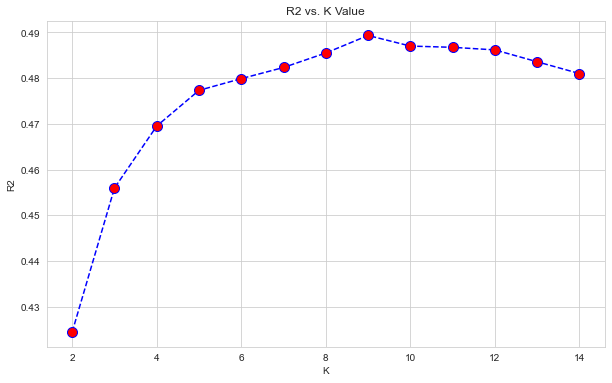

In [90]:
plt.figure(figsize=(10,6))
plt.plot(range(2,15), scores, color = 'blue', linestyle='dashed',
marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')

In [92]:
k_predictions, k_y_test, k_r2 = modeling_2(y, X, models=[KNeighborsRegressor(n_neighbors=5)], test_size=0.3)

KNeighborsRegressor() metrics are: 
R2 = 0.48
R2 adjusted = 0.48
RMSE = 263255.33
MSE = 69303366858.89
MAE = 158926.32


In [93]:
LR_predictions, LR_y_test, LR_r2 = modeling_2(y, X, models=[LinearRegression()],test_size=0.3)

LinearRegression() metrics are: 
R2 = 0.63
R2 adjusted = 0.63
RMSE = 221122.33
MSE = 48895083739.5
MAE = 141003.66


In [94]:
MLP_predictions, y_test, MLP_r2 = modeling_2(y, X, models=[MLPRegressor(max_iter=250)],test_size=0.3)

MLPRegressor(max_iter=250) metrics are: 
R2 = 0.54
R2 adjusted = 0.54
RMSE = 246782.1
MSE = 60901406770.26
MAE = 159889.6


In [95]:
k_results = diff_df(y_test, k_predictions)
k_results

,true,pred,diff
9245,6890000,1616000.0,5274000.0
3910,7060000,1934800.0,5125200.0
1162,5110000,2145800.0,2964200.0
2624,4500000,1558600.0,2941400.0
13954,3400000,787850.0,2612150.0
14542,2890000,500400.0,2389600.0
8629,4490000,2122000.0,2368000.0
10454,3120000,924000.0,2196000.0
18314,2920000,758460.0,2161540.0
2862,3600000,1778000.0,1822000.0


In [96]:
LR_results = diff_df(y_test, LR_predictions)
LR_results

,true,pred,diff
9245,6890000,2.665485e+06,4.224515e+06
3910,7060000,3.095073e+06,3.964927e+06
8629,4490000,1.674795e+06,2.815205e+06
1162,5110000,2.777840e+06,2.332160e+06
2624,4500000,2.524321e+06,1.975679e+06
20279,3200000,1.468007e+06,1.731993e+06
21514,3000000,1.311640e+06,1.688360e+06
2897,3000000,1.553216e+06,1.446784e+06
15856,640000,-7.681190e+05,1.408119e+06
18288,3300000,1.922645e+06,1.377355e+06


In [97]:
MLP_results = diff_df(y_test, MLP_predictions)
MLP_results

,true,pred,diff
9245,6890000,2.750976e+06,4.139024e+06
3910,7060000,3.003704e+06,4.056296e+06
1162,5110000,2.202486e+06,2.907514e+06
2624,4500000,1.735734e+06,2.764266e+06
8629,4490000,1.758212e+06,2.731788e+06
13954,3400000,1.316553e+06,2.083447e+06
10454,3120000,1.108798e+06,2.011202e+06
7306,3100000,1.091804e+06,2.008196e+06
2862,3600000,1.682581e+06,1.917419e+06
20279,3200000,1.375145e+06,1.824855e+06


In [2]:
###tableau

#https://public.tableau.com/app/profile/chris.geb2791/viz/project-regression/Dashboard1?publish=yes